In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv(r"/content/drive/My Drive/Colab Notebooks/ppr/D3-Pamela/S4/Office_Pamela-S4.csv",index_col='timestamp')

In [4]:
train_data = df.iloc[:7920]
test_data = df.iloc[7920:]

In [5]:
len(train_data),len(test_data)

(7920, 720)

In [6]:
def load_data(data, seq_len):
    X = []
    y = []
    #print(len(data))
    for i in range(seq_len, len(data)):
        X.append(data.iloc[i-seq_len : i, 0])
        y.append(data.iloc[i, 0])
        #print(y)
   
    
    return [X, y]

In [7]:
# Sequence of training data
seq_len = 24 #choose sequence length

X1, y1= load_data(train_data, seq_len)

In [8]:
#Sequence of testing data
seq_len = 24 #choose sequence length

X2, y2= load_data(test_data, seq_len)

In [9]:
X_train = X1      
y_train = y1
X_test = X2             
y_test = y2

In [10]:
# convert training and testing data to numpy array
X_train = np.array(X_train)
y_train = np.array(y_train)
  
X_test = np.array(X_test)
y_test = np.array(y_test)

# reshape data to input into 3 dimension
X_train = np.reshape(X_train, (X_train.shape[0], seq_len, 1))
X_test = np.reshape(X_test, (X_test.shape[0], seq_len, 1))

In [11]:
print('X_train.shape = ',X_train.shape)
print('y_train.shape = ',y_train.shape)
print('X_test.shape = ',X_test.shape)
print('y_test.shape = ',y_test.shape)

X_train.shape =  (7896, 24, 1)
y_train.shape =  (7896,)
X_test.shape =  (696, 24, 1)
y_test.shape =  (696,)


In [12]:
import tensorflow as tf
import sklearn.preprocessing
from tensorflow.keras.layers import Dense,LSTM
from tensorflow.keras.models import Sequential

In [13]:
# define model
model = Sequential()
model.add(LSTM(24, activation='tanh', return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(24, activation='tanh'))
model.add(Dense(1))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 24, 24)            2496      
                                                                 
 lstm_1 (LSTM)               (None, 24)                4704      
                                                                 
 dense (Dense)               (None, 1)                 25        
                                                                 
Total params: 7,225
Trainable params: 7,225
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.compile(optimizer="adam",loss="MSE")
model.fit(X_train, y_train, epochs=300, batch_size=128)

Epoch 1/300
62/62 [==============================] - 5s 26ms/step - loss: 760.2785
Epoch 2/300
62/62 [==============================] - 2s 27ms/step - loss: 514.7725
Epoch 3/300
62/62 [==============================] - 2s 26ms/step - loss: 421.6555
Epoch 4/300
62/62 [==============================] - 2s 27ms/step - loss: 366.4955
Epoch 5/300
62/62 [==============================] - 2s 27ms/step - loss: 322.7380
Epoch 6/300
62/62 [==============================] - 2s 26ms/step - loss: 286.4831
Epoch 7/300
62/62 [==============================] - 2s 26ms/step - loss: 256.0889
Epoch 8/300
62/62 [==============================] - 2s 26ms/step - loss: 230.7361
Epoch 9/300
62/62 [==============================] - 2s 26ms/step - loss: 209.5671
Epoch 10/300
62/62 [==============================] - 2s 25ms/step - loss: 192.1797
Epoch 11/300
62/62 [==============================] - 2s 26ms/step - loss: 177.9152
Epoch 12/300
62/62 [==============================] - 2s 26ms/step - loss: 166.3799
E

In [15]:
train_prediction=model.predict(X_train)
test_prediction=model.predict(X_test)

In [16]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

from math import sqrt

In [17]:
rmse_train = sqrt(mean_squared_error(y_train, train_prediction))
rmse_test = sqrt(mean_squared_error(y_test, test_prediction))

mae_train=mean_absolute_error(y_train, train_prediction)
mae_test=mean_absolute_error(y_test, test_prediction)

mape_train = mean_absolute_percentage_error(y_train, train_prediction)
mape_test = mean_absolute_percentage_error(y_test, test_prediction)

In [18]:
print('Root Mean Squared Error for Stacked LSTM Model for training is:',rmse_train)
print('Root Mean Squared Error for Stacked LSTM Model for testing is:',rmse_test)
print('Mean Absolute Error for Stacked LSTM Model for training is:',mae_train)
print('Mean Absolute Error for Stacked LSTM Model for testing is:',mae_test)
print('MAPE for Stacked Model for training is:',mape_train)
print('MAPE for Stacked Model for testing is:',mape_test)

Root Mean Squared Error for Stacked LSTM Model for training is: 2.594113169298306
Root Mean Squared Error for Stacked LSTM Model for testing is: 3.094714939461432
Mean Absolute Error for Stacked LSTM Model for training is: 1.945609520729814
Mean Absolute Error for Stacked LSTM Model for testing is: 2.2919393395235326
MAPE for Stacked Model for training is: 0.07806292613134805
MAPE for Stacked Model for testing is: 0.09148421763370053


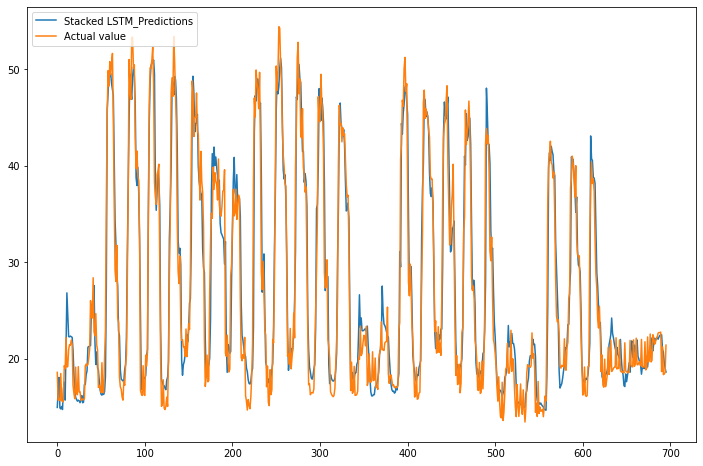

In [19]:
#pred=model.predict(X_test)
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,8)
plt.plot(test_prediction,label='Stacked LSTM_Predictions')
plt.plot(y_test,label='Actual value')
plt.legend(loc="upper left")
plt.show()

In [20]:
y_test=y_test.reshape(-1,1)

y_test[0],test_prediction[0]

(array([18.61666667]), array([14.987957], dtype=float32))

In [21]:
d1=[]
for i in range(len(y_test)):
    d1.append(y_test[i]-test_prediction[i])
    
print(d1)

[array([3.62870967]), array([-0.91820717]), array([-2.21504974]), array([0.76153882]), array([3.66737556]), array([0.65010999]), array([0.78362363]), array([-1.23174832]), array([1.70981496]), array([3.23619435]), array([1.10259006]), array([-7.68453916]), array([-5.29850807]), array([-1.33467128]), array([-0.82311096]), array([-0.94119937]), array([-0.33663228]), array([-0.72166595]), array([-3.63165245]), array([-2.00834516]), array([-0.96480916]), array([3.13751843]), array([0.6391861]), array([0.67379849]), array([3.46967633]), array([0.92010841]), array([1.13659656]), array([0.04571139]), array([-0.4683609]), array([0.3996886]), array([0.24954083]), array([-1.46361148]), array([1.91383412]), array([1.11252377]), array([0.52351825]), array([-1.78081207]), array([-1.13041636]), array([-0.32421048]), array([4.66270129]), array([-1.11651128]), array([-1.23485374]), array([3.60408275]), array([-4.7741553]), array([0.57374992]), array([5.27411969]), array([0.74793027]), array([1.8585481

In [22]:
d1.sort()
# Range of error value
max(d1),min(d1)

(array([15.02462222]), array([-11.5628685]))

In [23]:
neg=[]
pos=[]
for i in range(len(d1)):
  if(d1[i]<0):
    neg.append(d1[i])
  if(d1[i]>0):  
    pos.append(d1[i])

In [24]:
len(neg),len(pos)

(411, 285)